## Observations and Insights 

Observations: 
1. In reviewing the data for timepoints for all mice in this study by drug regimen, it becomes apparent that most treatments have more than 150 time points, with the exception of Propriva which had approximately only 150 time points. This may be due to a lack of reduction of Tumor Volume, an overgrowth of Tumor Volume, or no change seen at all. The two treatments that had the highest number of time points were Capomullin and Ramicane, which both had over 200 time points for the mice treated. This may indicate an observation of Tumor Volume reduction seen in both treatments. 

2. In reviewing the boxplot data for the final tumor volume of each mouse across four of the treatment regimens Capomulin, Ceftamin, Infubinol and Ramicane, at the last time point for each treatment Ceftamin and Infubinol had the highest upper bounds and lower bounds for tumor volume. Infubinol had one outlier below its lower bound quartile. However, Capomulin and Ramicane had the lowest tumor volumes at the last time point. In reviewing the total timepoints per data and drug regimen for all mice, both Capomulin and Ramicane contained more time points, which brings a stronger case that both of these treatments positively impacted the reduction of Tumor Volume per MM3. 

3. In reviewing the individual data for Mouse X401, who was treated with Capomulin as the number of times points increased the Tumor Volume decreased from being over 45.0MM3 to under 30.0MM3.  At first glance, it seems that Capomulin is a protective measure for tumor reduction in mice.  


In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studydata_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
# Display the data table for preview
studydata_complete


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [51]:
# Checking the number of mice.
studydata_complete["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmice = studydata_complete.loc[studydata_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dupmice

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
#takes all the data from the orriginal data frame just for that ID. do a .loc and do it dupmice 
dupmice1 = studydata_complete.loc[studydata_complete.duplicated(subset=['Mouse ID', 'Timepoint',])]
dupmice_data = dupmice1.copy()
dupmice_data

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = studydata_complete.copy()

clean_df=clean_df[clean_df['Mouse ID'].isin(dupmice)==False]

In [55]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_volume_df=clean_df.copy()
tumor_volume_df=tumor_volume_df.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meantumor=tumor_volume_df["Tumor Volume (mm3)"].mean()
mediantumor=tumor_volume_df["Tumor Volume (mm3)"].median()
vartumor=tumor_volume_df["Tumor Volume (mm3)"].var()
stdtumor=tumor_volume_df["Tumor Volume (mm3)"].std()
semtumor=tumor_volume_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe
tumor_volume_df=pd.DataFrame({
    "Mean":meantumor, 
    "Median":mediantumor,
    "Variance":vartumor,
    "Standard Deviation":stdtumor,
    "SEM":semtumor})
tumor_volume_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [57]:
#describe method just to see if it would get all of the data needed using describe 
clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()

count       mean       std        min        25%        50%  \
Drug Regimen                                                                
Capomulin     230.0  40.675741  4.994774  23.343598  37.685933  41.557809   
Ceftamin      178.0  52.591172  6.268188  45.000000  47.208427  51.776157   
Infubinol     178.0  52.884795  6.567243  36.321346  47.312353  51.820584   
Ketapril      188.0  55.235638  8.279709  45.000000  48.232987  53.698743   
Naftisol      186.0  54.331565  8.134708  45.000000  47.285874  52.509285   
Placebo       181.0  54.033581  7.821003  45.000000  47.459053  52.288934   
Propriva      148.0  52.320930  6.622085  45.000000  46.894328  50.446266   
Ramicane      228.0  40.216745  4.846308  22.050126  36.674635  40.673236   
Stelasyn      181.0  54.233149  7.710419  45.000000  48.047139  52.431737   
Zoniferol     182.0  53.236507  6.966589  45.000000  47.337876  51.818479   

                    75%        max  
Drug Regimen                        
Capomulin     45.000000  48.158209  
Ceftamin      56.801438  68.923185  
Infubinol     57.314444  72.226731  
Ketapril      60.870951  78.567014  
Naftisol      59.963034  76.668817  
Placebo       59.916934  73.212939  
Propriva      56.491585  72.455421  
Ramicane      45.000000  47.622816  
Stelasyn      58.719297  75.123690  
Zoniferol     57.954259  73.324432

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#The agg() method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis. 
tumor_volume2_df=clean_df.copy()
tumor_volume2_df=tumor_volume2_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
tumor_volume2_df

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

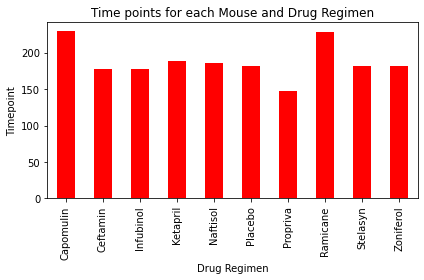

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_allmice_df=clean_df.copy()
tp_allmice_df=tp_allmice_df.groupby(["Drug Regimen"]).count()["Timepoint"]
#plot the data 
pandaplot_tp=tp_allmice_df.plot(kind="bar",figsize=(6,4), color='r')
pandaplot_tp.set_xlabel("Drug Regimen")
pandaplot_tp.set_ylabel("Timepoint")
pandaplot_tp.set_title("Time points for each Mouse and Drug Regimen")
plt.tight_layout()


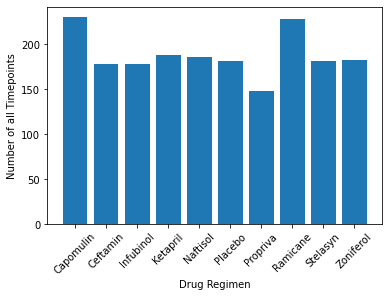

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tp_allmice2_df=tp_allmice_df
plt.bar(tp_allmice2_df.index,tp_allmice2_df.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of all Timepoints")
plt.xticks(rotation=45)
plt.show()


<AxesSubplot:title={'center':'Distribution of Female vs. Male Mice'}, ylabel='Mouse ID'>

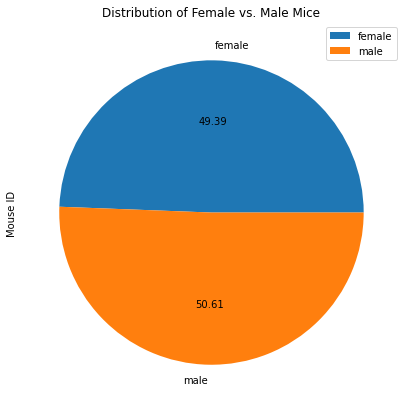

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
by_gender=studydata_complete.copy()
by_gender=by_gender.groupby(["Sex"]).count()
by_gender.plot.pie(y="Mouse ID", figsize=(7,7), title='Distribution of Female vs. Male Mice',labels=['female', 'male'], autopct='%.2f')


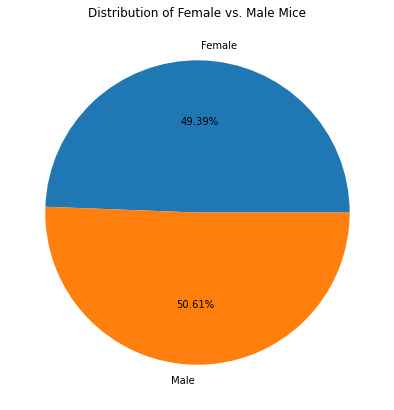

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y_axis=by_gender['Mouse ID']
labels='Female', 'Male'
#use this plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
fig, ax = plt.subplots()
fig.set_size_inches(7,7) 
ax.pie(y_axis, labels=labels, autopct='%1.2f%%')
plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
#Making variables for the drugs just as prework to look at the data  
capo=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
rami=clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
infu=clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
ceft=clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]
# use concat to align them to the axis I want
four_regs=pd.concat([capo,rami,infu,ceft])
# Locate the rows which contain mice on each drug and get the tumor volumes
capo_tv=capo["Tumor Volume (mm3)"]
rami_tv=rami["Tumor Volume (mm3)"]
infu_tv=infu["Tumor Volume (mm3)"]
ceft_tv=ceft["Tumor Volume (mm3)"]
#I thought 45 was the last time point however time point can vary for each mouse. This was helpful in me picking a mouse later so I kept it.  
four_regs=four_regs[four_regs['Timepoint']==45]
four_regs

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
104      u364    Capomulin    Male          18          17         45   
124      y793    Capomulin    Male          17          17         45   
...       ...          ...     ...         ...         ...        ...   
1670     w151     Ceftamin    Male          24          25         45   
1773     x581     Ceftamin  Female          19          28         45   
1797     x822     Ceftamin    Male           3          29         45   
1845     y769     Ceftamin  Female           6          27         45   
1855     y865     Ceftamin    Male          23          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
19             23.343598                 1  
29             28.484033                 0  
39             28.430964                 1  
104            31.023923                 3  
124            31.896238                 2  
...                  ...               ...  
1670           67.527482                 3  
1773           64.634949                 3  
1797           61.386660                 3  
1845           68.594745                 4  
1855           64.729837                 3  

[63 rows x 8 columns]

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftami

# Start by getting the last (greatest) timepoint for each mouse
by_mouse=clean_df.copy()
by_mouse=by_mouse.groupby("Mouse ID")
#now that I have the mice sorted I want the greatest timepoint. 
great_tp=by_mouse['Timepoint'].max()
#create a new data frame so I can merge it like instructions said. 
mouse_greattp=pd.DataFrame({"Timepoint":great_tp})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
great_tp_df=pd.merge(mouse_greattp,clean_df, on=("Mouse ID", "Timepoint"), how="inner")
great_tp_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#start a loop to do the things below
for i in treatment_labels:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
    last_treatment_pervol=great_tp_df.loc[(great_tp_df["Drug Regimen"]==i),:]["Tumor Volume (mm3)"]
    tumorvol_list.append(last_treatment_pervol)
   #set up quatile info pick up 
    quartile=last_treatment_pervol.quantile([.25, .5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq-lowerq
    lowbound=lowerq-(1.5*iqr)
    upbound=lowerq+(1.5*iqr)
    # Determine outlier using upper and lower bounds/ kept this in the loop so it would print each one 
    outliers = last_treatment_pervol[(last_treatment_pervol<lowbound)|(last_treatment_pervol>upbound)]
    print(f"{i}'s lower bound is:{lowbound} and upper bound is {upbound} and potential outliers are by line: {outliers}")

Capomulin's lower bound is:20.70456164999999 and upper bound is 44.05015203000001 and potential outliers are by line: 80     47.685963
162    46.539206
Name: Tumor Volume (mm3), dtype: float64
Ramicane's lower bound is:17.912664470000003 and upper bound is 45.20827463 and potential outliers are by line: 157    45.220869
Name: Tumor Volume (mm3), dtype: float64
Infubinol's lower bound is:36.83290494999999 and upper bound is 71.26431043 and potential outliers are by line: 27    72.226731
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's lower bound is:25.355449580000002 and upper bound is 72.08870612 and potential outliers are by line: Series([], Name: Tumor Volume (mm3), dtype: float64)


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

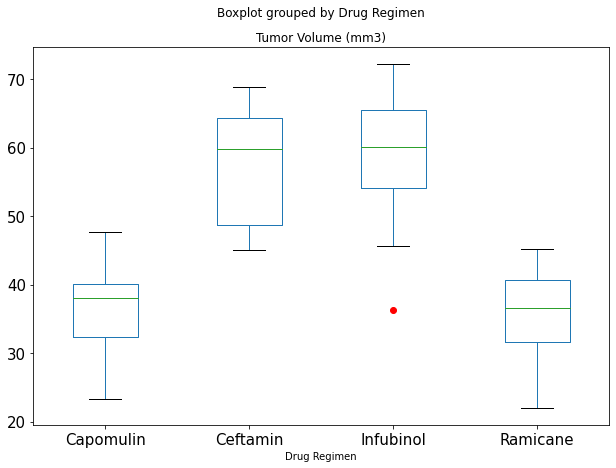

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumvol_tumvol=great_tp_df.copy()
final_tumvol=final_tumvol.loc[(final_tumvol["Drug Regimen"].isin(treatment_labels)),:]
final_tumvol
final_tumvol.boxplot(by="Drug Regimen",figsize=(10,7),fontsize=15, column="Tumor Volume (mm3)",grid=False, sym="r")

## Line and Scatter Plots

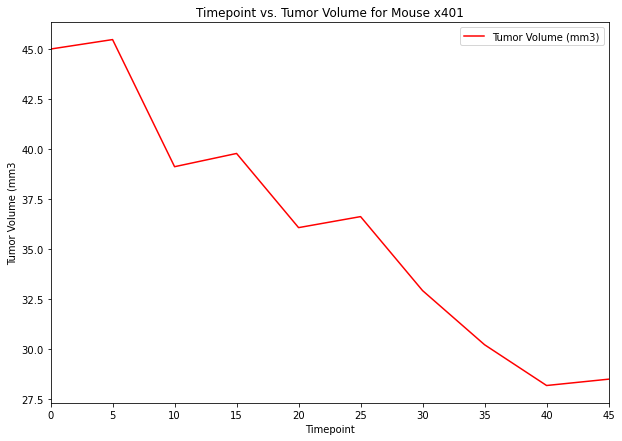

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#set data for 1 mouse
capo_data=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
mouse=capo_data.loc[capo_data["Mouse ID"] =="x401"]

# make line plot
mouse.plot(kind = "line", color="r",x = "Timepoint", y = "Tumor Volume (mm3)",figsize=(10,7))
plt.ylabel("Tumor Volume (mm3")
plt.title("Timepoint vs. Tumor Volume for Mouse x401")
plt.xlabel("Timepoint")

plt.xlim(0,45)
plt.show()

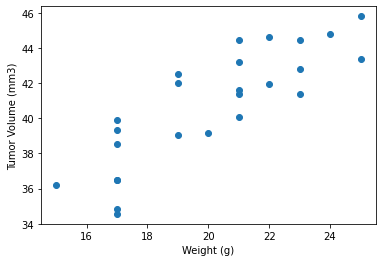

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
byid_capo= capo_data.groupby("Mouse ID")
tumor_av = byid_capo["Tumor Volume (mm3)"].mean()
weight_av = byid_capo["Weight (g)"].mean()
x_values=weight_av
y_values=tumor_av
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
reg_vals = x_values * slope + intercept
# Create line equation string
line_equals = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equals)


y = 0.95x +21.55


The r-value is: 0.7088568047708723


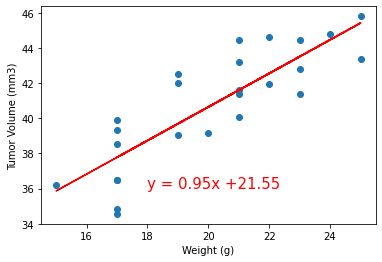

In [33]:
#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_vals,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
#show the line equations the 18, 36 is coordinants, started at 18 and 36 
plt.annotate(line_equals,(18,36),fontsize=15,color="red")
# Print r value 
print(f"The r-value is: {rvalue**2}")

plt.show()